<a href="https://colab.research.google.com/github/DevashishDeshmukh/Space-Crawlers/blob/main/Graph_TDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install networkx


In [2]:
!pip install haversine

In [3]:
import pandas as pd

# Read the filtered_pop.csv file with only the first 5000 rows
df = pd.read_csv('addhar_centers.csv', nrows=5000)

# Save the trimmed data to a new CSV file
df.to_csv('trimmed_addhar_centers.csv', index=False)


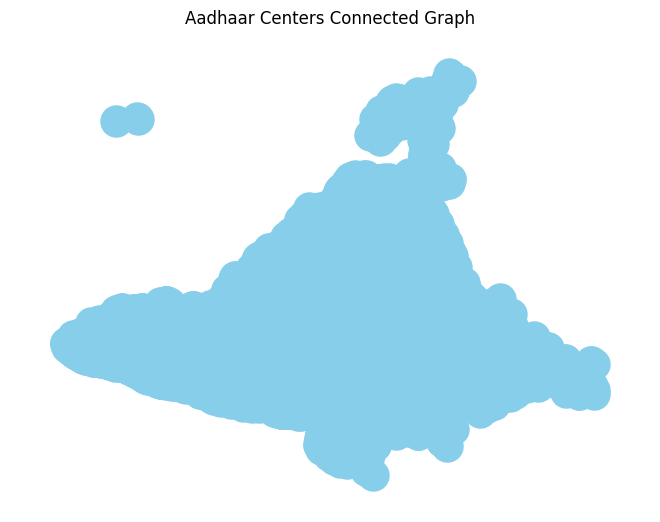

In [6]:
import networkx as nx
from haversine import haversine
import pandas as pd

# Load Aadhaar center coordinates from a CSV file
# Replace 'aadhaar_centers.csv' with your file name
data = pd.read_csv('trimmed_addhar_centers.csv')

# Extract latitude and longitude columns from the CSV
coordinates = list(zip(data['lat'], data['long']))

# Function to calculate distance between two points using Haversine formula
def calculate_distance(coord1, coord2):
    return haversine(coord1, coord2)  # Assuming haversine formula is used

# Create an empty graph
G = nx.Graph()

# Define a threshold distance (in kilometers)
threshold_distance = 50  # Change this threshold as needed

# Add nodes to the graph for each Aadhaar center
for i, center1 in enumerate(coordinates):
    G.add_node(i, pos=center1)  # Adding nodes with their positions

# Connect nodes (Aadhaar centers) based on the distance threshold
for i, center1 in enumerate(coordinates):
    for j, center2 in enumerate(coordinates):
        if i != j:  # Avoid comparing the same center
            distance = calculate_distance(center1, center2)
            if distance <= threshold_distance:
                G.add_edge(i, j)  # Add edge if distance meets the threshold

# Visualization (optional)
import matplotlib.pyplot as plt

pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=False, node_size=500, node_color='skyblue')
plt.title('Aadhaar Centers Connected Graph')
plt.show()


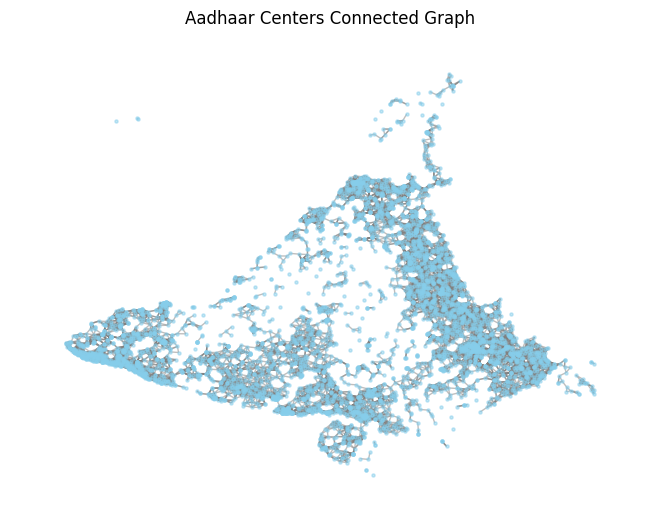

In [8]:
import networkx as nx
from haversine import haversine
import pandas as pd

# Load Aadhaar center coordinates from a CSV file
# Replace 'aadhaar_centers.csv' with your file name
data = pd.read_csv('trimmed_addhar_centers.csv')

# Extract latitude and longitude columns from the CSV
coordinates = list(zip(data['lat'], data['long']))

# Function to calculate distance between two points using Haversine formula
def calculate_distance(coord1, coord2):
    return haversine(coord1, coord2)  # Assuming haversine formula is used

# Create an empty graph
G = nx.Graph()

# Define a threshold distance (in kilometers)
threshold_distance = 50  # Change this threshold as needed

# Add nodes to the graph for each Aadhaar center
for i, center1 in enumerate(coordinates):
    G.add_node(i, pos=center1)  # Adding nodes with their positions

# Connect nodes (Aadhaar centers) based on the distance threshold
for i, center1 in enumerate(coordinates):
    for j, center2 in enumerate(coordinates):
        if i != j:  # Avoid comparing the same center
            distance = calculate_distance(center1, center2)
            if distance <= threshold_distance:
                G.add_edge(i, j)  # Add edge if distance meets the threshold

# Visualization (optional)
import matplotlib.pyplot as plt

pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=False, node_size=5, node_color='skyblue', edge_color='gray',alpha=0.5)
plt.title('Aadhaar Centers Connected Graph')
plt.show()
